**Universidad Internacional de La Rioja (UNIR) - Máster Universitario en Inteligencia Artificial - Procesamiento del Lenguaje Natural** 

***
Datos del alumno (Nombre y Apellidos): Miguel Ángel Navarro Arenas

Fecha: 11 diciembre 2024
***

<span style="font-size: 20pt; font-weight: bold; color: #0098cd;">Trabajo: Named-Entity Recognition</span>

**Objetivos** 

Con esta actividad se tratará de que el alumno se familiarice con el manejo de la librería spacy, así como con los conceptos básicos de manejo de las técnicas NER

**Descripción**

En esta actividad debes procesar de forma automática un texto en lenguaje natural para detectar características básicas en el mismo, y para identificar y etiquetar las ocurrencias de conceptos como localización, moneda, empresas, etc.

En la primera parte del ejercicio se proporciona un código fuente a través del cual se lee un archivo de texto y se realiza un preprocesado del mismo. En esta parte el alumno tan sólo debe ejecutar y entender el código proporcionado.

En la segunda parte del ejercicio se plantean una serie de preguntas que deben ser respondidas por el alumno. Cada pregunta deberá responderse con un fragmento de código fuente que esté acompañado de la explicación correspondiente. Para elaborar el código solicitado, el alumno deberá visitar la documentación de la librería spacy, cuyos enlaces se proporcionarán donde corresponda.

# Parte 1: carga y preprocesamiento del texto a analizar

Observa las diferentes librerías que se están importando.

In [30]:
import pathlib
import spacy
import pandas as pd
from spacy import displacy
import csv
import es_core_news_md
import re
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

El siguiente código simplemente carga y preprocesa el texto. Para ello, lo primero que hace es cargar un modelo de lenguaje previamente entrenado. En este caso, se utiliza <i>es_core_news_md</i>: 

https://spacy.io/models/es#es_core_news_md


In [31]:
nlp = es_core_news_md.load()

El objeto <i>nlp</i> permite utilizar el modelo de lenguaje cargado, de forma que se puede procesar un texto y obtenerlo en su versión preprocesada. Así, nos permite realizar las diferentes tareas. En este caso, vamos a utilizar el pipeline para hacer un preprocesamiento básico, que consiste en tokenizar el texto.

<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">CARGA DE LOS DATOS</span>

In [32]:
filename = "02Dataset_sin_procesar.csv"
data = pd.read_csv(filename, delimiter=';', encoding='utf-8', low_memory=False, encoding_errors='replace')  

<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">PREPROCESAMIENTO DE LOS DATOS</span>

In [33]:
data.head(5)

,MEDIO,SOPORTE,URL,TIPO DE MENSAJE,CONTENIDO A ANALIZAR,INTENSIDAD,TIPO DE ODIO,TONO HUMORISTICO,MODIFICADOR,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,EL PAÍS,WEB,https://elpais.com/deportes/2021-01-20/alcoyan...,COMENTARIO,el barça nunca acaeza ante un segundo b ni ant...,3.0,Otros,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,EL PAÍS,WEB,https://elpais.com/deportes/2021-01-20/alcoyan...,COMENTARIO,el real madrid ha puesto punto y final a su an...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,EL PAÍS,WEB,https://elpais.com/espana/2021-01-18/comienza-...,COMENTARIO,cristina cifuentes podría haber sido la presid...,3.0,Ideológico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,EL PAÍS,WEB,https://elpais.com/espana/2021-01-18/comienza-...,COMENTARIO,habría que reabrir el caso. el supremo se dedi...,3.0,Ideológico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,EL PAÍS,WEB,https://elpais.com/espana/2021-01-18/comienza-...,COMENTARIO,me parece un poco exagerado pedir más de tres ...,3.0,Ideológico,Si,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574915 entries, 0 to 574914
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   MEDIO                 574915 non-null  object 
 1   SOPORTE               574881 non-null  object 
 2   URL                   574767 non-null  object 
 3   TIPO DE MENSAJE       574763 non-null  object 
 4   CONTENIDO A ANALIZAR  574763 non-null  object 
 5   INTENSIDAD            574642 non-null  object 
 6   TIPO DE ODIO          12296 non-null   object 
 7   TONO HUMORISTICO      146 non-null     object 
 8   MODIFICADOR           353 non-null     object 
 9   Unnamed: 9            3 non-null       object 
 10  Unnamed: 10           3 non-null       object 
 11  Unnamed: 11           2 non-null       object 
 12  Unnamed: 12           2 non-null       object 
 13  Unnamed: 13           2 non-null       object 
 14  Unnamed: 14           2 non-null       object 
 15  

<span style="font-size: 12pt; font-weight: bold; color:rgb(135, 223, 255);">Nos quedamos con las columnas que contienen infomración relevante o no tienen demasiadas columnas como NaN o nulos.</span>

In [35]:
data = data[['MEDIO', 'SOPORTE', 'URL', 'TIPO DE MENSAJE', 'CONTENIDO A ANALIZAR', 'INTENSIDAD']]

In [36]:
data.head(5)

,MEDIO,SOPORTE,URL,TIPO DE MENSAJE,CONTENIDO A ANALIZAR,INTENSIDAD
0,EL PAÍS,WEB,https://elpais.com/deportes/2021-01-20/alcoyan...,COMENTARIO,el barça nunca acaeza ante un segundo b ni ant...,3.0
1,EL PAÍS,WEB,https://elpais.com/deportes/2021-01-20/alcoyan...,COMENTARIO,el real madrid ha puesto punto y final a su an...,0.0
2,EL PAÍS,WEB,https://elpais.com/espana/2021-01-18/comienza-...,COMENTARIO,cristina cifuentes podría haber sido la presid...,3.0
3,EL PAÍS,WEB,https://elpais.com/espana/2021-01-18/comienza-...,COMENTARIO,habría que reabrir el caso. el supremo se dedi...,3.0
4,EL PAÍS,WEB,https://elpais.com/espana/2021-01-18/comienza-...,COMENTARIO,me parece un poco exagerado pedir más de tres ...,3.0


<span style="font-size: 12pt; font-weight: bold; color:rgb(135, 223, 255);"> Eliminamos los pocos NaN o nulos que quedan en las columnas restantes.</span> </br> </br>
Como tenemos mucha información y muchas líneas en nuestro dataset, nos podemos permitir realizar esto. 

In [37]:
data = data.dropna()

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 574641 entries, 0 to 574914
Data columns (total 6 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   MEDIO                 574641 non-null  object
 1   SOPORTE               574641 non-null  object
 2   URL                   574641 non-null  object
 3   TIPO DE MENSAJE       574641 non-null  object
 4   CONTENIDO A ANALIZAR  574641 non-null  object
 5   INTENSIDAD            574641 non-null  object
dtypes: object(6)
memory usage: 30.7+ MB


<span style="font-size: 12pt; font-weight: bold; color:rgb(135, 223, 255);">Vamos a cambiar los tipos de nuestras columnas para reducir sustancialmente el peso de nuestro dataset y que nos sea más sencillo y rápido trabajar sobre él. </span>

In [39]:
import warnings

warnings.filterwarnings('ignore')

data['MEDIO'] = data['MEDIO'].astype('category')
data['SOPORTE'] = data['SOPORTE'].astype('category')
data['TIPO DE MENSAJE'] = data['TIPO DE MENSAJE'].astype('category')

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 574641 entries, 0 to 574914
Data columns (total 6 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   MEDIO                 574641 non-null  category
 1   SOPORTE               574641 non-null  category
 2   URL                   574641 non-null  object  
 3   TIPO DE MENSAJE       574641 non-null  category
 4   CONTENIDO A ANALIZAR  574641 non-null  object  
 5   INTENSIDAD            574641 non-null  object  
dtypes: category(3), object(3)
memory usage: 19.2+ MB


<span style="font-size: 12pt; font-weight: bold; color:rgb(135, 223, 255);">Nuestra columna INTENSIDAD también puede cambiar su tipo a float. </span>

In [41]:
#data['INTENSIDAD'] = data['INTENSIDAD'].astype(float)

Como obtenemos un error, vamos a observar el contenido de esta columna para ver que esté correcto: 

In [42]:
print(data['INTENSIDAD'].unique())

['3.0' '0.0' '4.0' '2.0' '1.0' '5.0' '6.0' ' la vila joiosa, 52'
 ' tanya kozyreva en ucrania']


In [43]:
intensity_counts = data['INTENSIDAD'].value_counts()
print(intensity_counts)

INTENSIDAD
0.0                           562342
4.0                            10375
1.0                             1377
5.0                              211
3.0                              172
2.0                              148
6.0                               13
 la vila joiosa, 52                2
 tanya kozyreva en ucrania         1
Name: count, dtype: int64


In [44]:
data_cleaned = data[~data['INTENSIDAD'].isin([' la vila joiosa, 52', ' tanya kozyreva en ucrania'])]

print(data_cleaned['INTENSIDAD'].unique())

['3.0' '0.0' '4.0' '2.0' '1.0' '5.0' '6.0']


In [45]:
data_cleaned = data[~data['INTENSIDAD'].str.contains('[a-zA-Z]', na=False)]

data_cleaned['INTENSIDAD'] = data_cleaned['INTENSIDAD'].astype(float)

data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 574638 entries, 0 to 574914
Data columns (total 6 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   MEDIO                 574638 non-null  category
 1   SOPORTE               574638 non-null  category
 2   URL                   574638 non-null  object  
 3   TIPO DE MENSAJE       574638 non-null  category
 4   CONTENIDO A ANALIZAR  574638 non-null  object  
 5   INTENSIDAD            574638 non-null  float64 
dtypes: category(3), float64(1), object(2)
memory usage: 19.2+ MB


<span style="font-size: 12pt; font-weight: bold; color:rgb(135, 223, 255);">Hemos pasado de un dataset de 30.7MB a uno de 19.2MB, reduciendo en un tercio el tamaño de uso de memoria del mismo. </span>

<span style="font-size: 12pt; font-weight: bold; color:rgb(135, 223, 255);">Vamos a hacer una lista con los caracteres de todos los textos para observar cuáles no son </br>
letras, números o signos de puntuación. </span>

In [46]:
regex = r'[^a-zA-Z0-9\s\.,;:\'\"()\[\]{}\-¿?¡!áéíóúÁÉÍÓÚüÜñÑ@#\$%&\*\+<>=/\\_]'

# Unir todos los textos en una sola cadena
all_text = ' '.join(data_cleaned['CONTENIDO A ANALIZAR'])

non_alphanumeric_chars = re.findall(regex, all_text)

unique_non_alphanumeric_chars = list(set(non_alphanumeric_chars))

print(unique_non_alphanumeric_chars)

['‐', 'ئ', '𝗰', 'е', '≤', '𝕯', '祈', '𠁮', '催', '̆', 'ı', '𝗮', '𝙖', 'ᴛ', '小', '₀', '本', 'ᑭ', '𝐑', '𝖊', 'ί', 'ｅ', 'ג', 'ṣ', '依', 'แ', '𝙙', '´', 'ɴ', 'ּ', '𝙩', '𝗲', 'ʟ', '𝐭', '解', '万', '𝕔', 'ښ', 'ー', '٤', 'و', '𝘭', '\u0e00', 'ο', '写', '起', 'ᵖ', 'ช', 'ᵕ', '¢', 'ë', 'ع', 'グ', '✿', '間', 'ɐ', '⡏', 'č', 'ೆ', '¼', '𝗔', '⠘', 'な', '𝔀', '未', '初', '𝘡', '優', '𝕸', '𝗇', '風', '性', 'り', 'ୁ', 'き', '●', '𝙉', '⚘', '𝐇', '𝕒', '~', '𝓭', 'を', '♪', 'シ', '𝙋', '𝓲', '라', '𝙣', 'ק', '⠀', 'ｚ', '“', 'ŋ', '⁰', '₃', '𝗙', '𝙳', 'і', 'ى', '𝓖', '𝗼', 'ő', '¹', '了', '𝔂', 'ŕ', 'リ', '𝚙', 'ی', 'ผ', '𝐊', 'ジ', '模', 'ʜ', '。', '٥', 'そ', '𠁿', '₉', '美', '隆', '”', '𝘿', '͡', 'ว', '𝑹', 'ポ', '𠁢', '～', '𝐺', '‘', '⢀', '注', 'ц', 'ಡ', '⅙', 'б', '奥', 'び', 'ç', 'ね', 'ز', 'н', 'ɪ', '来', 'の', '量', '当', 'æ', '⅒', '⁸', '𝐍', '국', 'ω', '帰', 'ح', '輪', '足', '𝙡', '葉', '？', 'ᴇ', '†', 'ป', '한', 'ᴅ', '𝐫', '対', 'ಶ', 'χ', '𝕚', '⢸', '五', '落', 'ғ', 'ظ', 'ル', 'わ', '者', '🆂', 'せ', '骨', '±', 'å', '′', 'ろ', 'ಮ', '٦', 'ψ', '贸', 'ğ', 'ಚ', 'କ', 'ร', 'ท', '𝒘', '≥', '𝗿',

Eliminamos todos los caracteres no alfanuméricos mediante el replace por un espacio vacío para que no nos de problemas a la hora de entrenar el modelo. 

In [47]:
data_cleaned['CONTENIDO A ANALIZAR'] = data_cleaned['CONTENIDO A ANALIZAR'].str.replace(regex, '', regex=True)

<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">EXPORTAR DATASET LIMPIO</span>

In [48]:
data_cleaned.to_csv('dataset_limpio.csv', index=False, encoding='utf-8')

<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">CONTINUACIÓN DEL EJERCICIO. </span> </br> </br>
<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">DATA IMPORTANTE + PLAYGROUND</span>

El código anterior carga el archivo CSV (opcionalmente con un límite de líneas a leer) y genera la variable <i>data</i>, que contiene un Dataframe (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) con los datos leídos del CSV.

Te vendrá bien conocer la siguiente documentación:
<ul>
    <li>https://spacy.io/api/doc</li>
    <li>https://spacy.io/api/token</li>
    <li>https://spacy.io/api/morphology#morphanalysis</li>
</ul>

### Playground

Utiliza este espacio para hacer pruebas y ensayos con las variables generadas con el código previo. A modo de ejemplo, se ofrece código que realiza las siguientes tareas: 


- leer un número dado de líneas del Dataframe y generar dos listas con los valores (se pueden leer directamente del DataFrame, se muestra el ejemplo como una opción más)
- procesar el texto de cada comentario


Para procesarlo, hay utilizar el objeto <i>nlp</i> y así obtener objetos de la clase <i>Doc</i> (https://spacy.io/api/doc)

Visita la documentación de dicha clase y experimenta probando las diferentes funciones y atributos 

In [49]:
# Puedes insertar aquí código de pruebas para experimentar con las diferentes funciones y atributos de 'doc'.
print(data["CONTENIDO A ANALIZAR"][1])
print(data["INTENSIDAD"][1])
doc = []
value = []

el real madrid ha puesto punto y final a su andadura en la copa del rey en el primer escalón. los de zidane han caído ante el alcoyano, de segunda b, a pesar de empezar ganando y jugar con un hombre menos en la prórroga. el técnico francés dispuso un equipo plagado de los menos habituales, con vinicius y mariano en ataque. ninguno de los dos logró crear ocasiones. fue militao el que marcó el gol del madrid, justo antes del descanso. en la segunda parte intentaron cerrar el partido, pero sin el colmillo suficiente y el modesto alcoyano aprovechó un córner para empatar el partido a cinco minutos para el final. el empate sentó como un jarro de agua fría a los blancos, que lo intentaron en el tiempo extra a falta de cinco minutos, el casanova consiguió el gol más importante de su vida, que vale la clasificación para octavos de la copa. el madrid de zidane queda apeado del torneo una vez más, por lo que el francés se quedará sin pelear por el único título que no ha conseguido nunca. así hem

<span style="font-size: 12pt; font-weight: bold; color:rgb(135, 223, 255);">Vamos a leer nuevamente el dataset limpio y el dataset original para responder a las preguntas según corresponda. Llegará un momento en el que sólo trabajaremos con el dataset limpio y lo mencionaremos y el porqué de esta decisión. Mientras tanto, compararemos entre ambos datasets para ver los diferentes resultados que se obtienen. </span>

In [50]:
filename = "02Dataset_sin_procesar.csv"
data_original = pd.read_csv(filename, delimiter=';', encoding='utf-8', low_memory=False, encoding_errors='replace')  

In [51]:
data_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574915 entries, 0 to 574914
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   MEDIO                 574915 non-null  object 
 1   SOPORTE               574881 non-null  object 
 2   URL                   574767 non-null  object 
 3   TIPO DE MENSAJE       574763 non-null  object 
 4   CONTENIDO A ANALIZAR  574763 non-null  object 
 5   INTENSIDAD            574642 non-null  object 
 6   TIPO DE ODIO          12296 non-null   object 
 7   TONO HUMORISTICO      146 non-null     object 
 8   MODIFICADOR           353 non-null     object 
 9   Unnamed: 9            3 non-null       object 
 10  Unnamed: 10           3 non-null       object 
 11  Unnamed: 11           2 non-null       object 
 12  Unnamed: 12           2 non-null       object 
 13  Unnamed: 13           2 non-null       object 
 14  Unnamed: 14           2 non-null       object 
 15  

In [52]:
data_cleaned = pd.read_csv('dataset_limpio.csv', encoding='utf-8', low_memory=False, encoding_errors='replace')

In [53]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574638 entries, 0 to 574637
Data columns (total 6 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   MEDIO                 574638 non-null  object 
 1   SOPORTE               574638 non-null  object 
 2   URL                   574638 non-null  object 
 3   TIPO DE MENSAJE       574638 non-null  object 
 4   CONTENIDO A ANALIZAR  574594 non-null  object 
 5   INTENSIDAD            574638 non-null  float64
dtypes: float64(1), object(5)
memory usage: 26.3+ MB


Cambio a variables categóricas para disminuir el tamaño

In [54]:
import warnings

warnings.filterwarnings('ignore')

data_cleaned['MEDIO'] = data_cleaned['MEDIO'].astype('category')
data_cleaned['SOPORTE'] = data_cleaned['SOPORTE'].astype('category')
data_cleaned['TIPO DE MENSAJE'] = data_cleaned['TIPO DE MENSAJE'].astype('category')

In [55]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574638 entries, 0 to 574637
Data columns (total 6 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   MEDIO                 574638 non-null  category
 1   SOPORTE               574638 non-null  category
 2   URL                   574638 non-null  object  
 3   TIPO DE MENSAJE       574638 non-null  category
 4   CONTENIDO A ANALIZAR  574594 non-null  object  
 5   INTENSIDAD            574638 non-null  float64 
dtypes: category(3), float64(1), object(2)
memory usage: 14.8+ MB


<span style="font-size: 18pt; font-weight: bold; color: #0098cd;">CONSIDERACIONES A PARTIR DE ESTE PUNTO: </span>

<span style="font-size: 12pt; font-weight: bold; color:rgb(135, 223, 255);">A partir de esta pregunta, el cómputo se hace muchísimo más costoso, siendo imposible en máquinas convencionales su ejecución. Es por ello que se va a proceder a reducir el tamaño del dataset, escogiendo únicamente una cantidad de filas del dataset limpio.</span>

Para realizar correctamente este proceso, se va a hacer primero un suffle del dataset original. Posteriormente, vamos a observar la distribución de la variable objetivo (columna ODIO) y se mantendrá esta proporción en el dataset recortado, para así intentar ser lo más similar a la realidad posible en el estudio acortado. Posteriormente, se intentará implementar el código en máquinas más potentes usando google colab o lightning.ai. 

In [56]:
data_cleaned['ODIO'] = data_cleaned['INTENSIDAD'].apply(lambda x: 1 if x > 0 else 0)

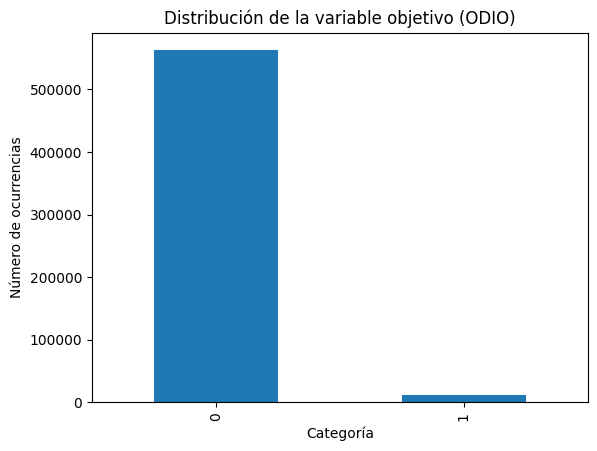

In [57]:
data_shuffled = data_cleaned.sample(frac=1, random_state=42).reset_index(drop=True)

odio_counts = data_cleaned['ODIO'].value_counts()

fig, ax = plt.subplots()
odio_counts.plot(kind='bar', ax=ax)

ax.set_title('Distribución de la variable objetivo (ODIO)')
ax.set_xlabel('Categoría')
ax.set_ylabel('Número de ocurrencias')

plt.show()

In [58]:
porcentaje_odio = (odio_counts[1] / odio_counts[0]) * 100
print(f'Porcentaje de ODIO en el subconjunto: {porcentaje_odio:.2f}%')

Porcentaje de ODIO en el subconjunto: 2.19%


In [59]:
subset_size = int(len(data_shuffled) * 0.02)

num_odio = int(subset_size * (odio_counts[1] / len(data_shuffled)))
num_no_odio = subset_size - num_odio

subset_odio = data_shuffled[data_shuffled['ODIO'] == 1].sample(n=num_odio, random_state=42)
subset_no_odio = data_shuffled[data_shuffled['ODIO'] == 0].sample(n=num_no_odio, random_state=42)

subset = pd.concat([subset_odio, subset_no_odio]).sample(frac=1, random_state=42).reset_index(drop=True)

print(subset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11492 entries, 0 to 11491
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   MEDIO                 11492 non-null  category
 1   SOPORTE               11492 non-null  category
 2   URL                   11492 non-null  object  
 3   TIPO DE MENSAJE       11492 non-null  category
 4   CONTENIDO A ANALIZAR  11491 non-null  object  
 5   INTENSIDAD            11492 non-null  float64 
 6   ODIO                  11492 non-null  int64   
dtypes: category(3), float64(1), int64(1), object(2)
memory usage: 393.5+ KB
None


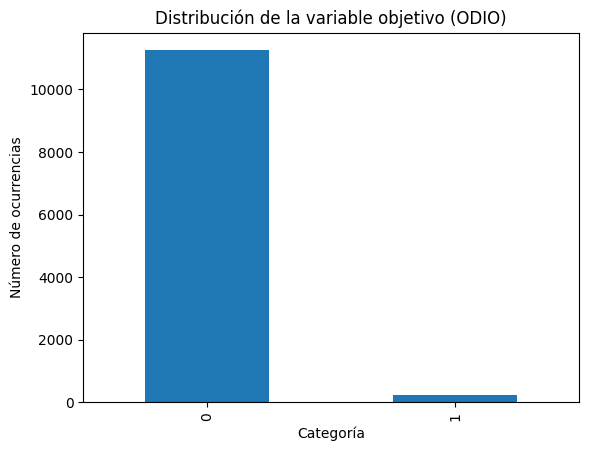

In [60]:
odio_counts = subset['ODIO'].value_counts()

fig, ax = plt.subplots()
odio_counts.plot(kind='bar', ax=ax)

ax.set_title('Distribución de la variable objetivo (ODIO)')
ax.set_xlabel('Categoría')
ax.set_ylabel('Número de ocurrencias')

plt.show()

In [61]:
porcentaje_odio = (odio_counts[1] / odio_counts[0]) * 100
print(f'Porcentaje de ODIO en el subconjunto: {porcentaje_odio:.2f}%')

Porcentaje de ODIO en el subconjunto: 2.18%


In [62]:
data_cleaned = subset.copy()

<span style="font-size: 12pt; font-weight: bold; color:rgb(135, 223, 255);">Ahora, vamos a hacer el cálculo del NLP de Spacy para cada una de las frases que tenemos en el dataset limpio. Lo vamos a hacer por batches o lotes porque sin ellos, el ordenador, si no es demasiado potente, se quedará sin memoria RAM enseguida y fallará el proceso. Guardando la información del proceso de NLP de Spacy, podremos acceder más sencillamente a la información. </span>

In [64]:
def process_batches(data, batch_size=1000):
    results = []
    for i in range(0, len(data), batch_size):
        batch = data[i:i+batch_size]
        docs = list(nlp.pipe(batch, batch_size=batch_size))
        results.extend([doc for doc in docs])
    return results

In [65]:
data_cleaned['ANALISIS_SPACY'] = process_batches(data_cleaned['CONTENIDO A ANALIZAR'].astype(str).tolist())

In [66]:
data_cleaned.head()

,MEDIO,SOPORTE,URL,TIPO DE MENSAJE,CONTENIDO A ANALIZAR,INTENSIDAD,ODIO,ANALISIS_SPACY
0,EL PAÍS,TWITTER,https://twitter.com/el_pais/status/13450737568...,COMENTARIO,en la cañada real hay de sobra,0.0,0,"(en, la, cañada, real, hay, de, sobra)"
1,EL MUNDO,TWITTER,https://twitter.com/958567190269132800/status/...,COMENTARIO,moros,0.0,0,(moros)
2,EL MUNDO,TWITTER,https://twitter.com/1720090500/status/13558532...,COMENTARIO,a mí me parece que nos toma por tontos. todos...,0.0,0,"(a, mí, me, parece, que, , nos, toma, por, to..."
3,EL PAÍS,WEB,https://www.elpais.com/espana/2021-01-08/efect...,COMENTARIO,pienso que es un demagogo peligroso.,0.0,0,"(pienso, que, es, un, demagogo, peligroso, .)"
4,LA VANGUARDIA,WEB,https://www.lavanguardia.com/vivo/psicologia/2...,TITULAR NOTICIA,el siniestro futuro que imagina mark zuckerberg,0.0,0,"(el, siniestro, futuro, que, imagina, mark, zu..."


In [67]:
data_cleaned.to_csv('dataset_con_spacy.csv', index=False, encoding='utf-8')

<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">Pregunta 1.</span>
<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">¿Cuántos registros contiene el corpus?</span>

<span style="font-size: 12pt; font-weight: bold; color:rgb(135, 223, 255);">RESULTADOS PARA EL DATASET COMPLETO</span>

In [68]:
# Incluye aquí el código generado para poder responder a tu pregunta
# REGISTROS DEL DATASET ORIGINAL SIN PROCESAR
print(f"El corpus original contiene {len(data_original)} registros.")

El corpus original contiene 574915 registros.


<span style="font-size: 12pt; font-weight: bold; color:rgb(135, 223, 255);">RESULTADOS PARA NUESTRO SUBSET SOBRE EL QUE TRABAJAREMOS</span>

In [69]:
# REGISTROS DEL SUBSET
print(f"El corpus preprocesado contiene {len(data_cleaned)} registros.")

El corpus preprocesado contiene 11492 registros.


<b>Incluye aquí, debajo de la línea, la explicación de tu respuesta</b>
<p>En este caso comparamos el número de filas que tiene cada uno de nuestros datasets. En este caso, vemos que apenas hay diferencia entre uno y otro, lo que indica que el corpus se ha limpiado muy bien y apenas hemos perdido información en este proceso de limpieza. Hemos imprimido por pantalla la longitud con la función len que indica el número de filas como hemos dicho anteriormente. Por tanto, vamos a dejar el dataset original de lado, ya que para las siguientes preguntas y análisis de las palabras, puede darnos errores o tiempos de ejecución demasiado altos. También, podemos obtener errores ya que hay tokens demasiado extraños en el dataset original, como letras en chino o árabe, lo cual nos puede dar bastantes fallos.</p>
<hr>
 

<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">Pregunta 2.</span>
<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">¿Cuántas palabras totales hay en los comentarios del corpus?</span>

<span style="font-size: 12pt; font-weight: bold; color:rgb(135, 223, 255);">RESULTADOS PARA EL DATASET COMPLETO</span>

In [70]:
# Incluye aquí el código generado para poder responder a tu pregunta
total_palabras = data_original['CONTENIDO A ANALIZAR'].str.split().str.len().sum()
print(f"El total de palabras en el corpus es: {int(total_palabras)}")

El total de palabras en el corpus es: 63025846


<span style="font-size: 12pt; font-weight: bold; color:rgb(135, 223, 255);">RESULTADOS PARA NUESTRO SUBSET</span>

In [71]:
# Incluye aquí el código generado para poder responder a tu pregunta
total_palabras = data_cleaned['CONTENIDO A ANALIZAR'].str.split().str.len().sum()
print(f"El total de palabras en el corpus es: {int(total_palabras)}")

El total de palabras en el corpus es: 1276655


<b>Incluye aquí, debajo de la línea, la explicación de tu respuesta</b>
<p>En esta pregunta, hemos recorrido toda la columna de CONTENIDO A ANALIZAR a la cual le hemos aplicado el método split, que divide cada string en cada fila por palabras (separando por espacios en blanco), después, hemos obtenido la longitud de este split y lo hemos sumado con la función sum. Con ello, obtenemos el total de palabras en nuestro dataset.</p>
<hr>
 

<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">Pregunta 3.</span>
<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">¿Cuál el número promedio de palabras en cada comentario?</span>

<span style="font-size: 12pt; font-weight: bold; color:rgb(135, 223, 255);">RESULTADOS PARA EL DATASET ORIGINAL</span>

In [72]:
# Incluye aquí el código generado para poder responder a tu pregunta
promedio_palabras = data_original[data_original['TIPO DE MENSAJE'] == 'COMENTARIO']['CONTENIDO A ANALIZAR'].str.split().str.len().mean()
print(f"El número promedio de palabras en cada comentario es: {promedio_palabras:.2f}")

El número promedio de palabras en cada comentario es: 46.81


<span style="font-size: 12pt; font-weight: bold; color:rgb(135, 223, 255);">RESULTADOS PARA NUESTRO SUBSET</span>

In [73]:
# Incluye aquí el código generado para poder responder a tu pregunta
promedio_palabras = data_cleaned[data_cleaned['TIPO DE MENSAJE'] == 'COMENTARIO']['CONTENIDO A ANALIZAR'].str.split().str.len().mean()
print(f"El número promedio de palabras en cada comentario es: {promedio_palabras:.2f}")

El número promedio de palabras en cada comentario es: 48.08


<b>Incluye aquí, debajo de la línea, la explicación de tu respuesta</b>
<p>En este caso, es muy similar al anterior, solo que en lugar de sumar el total de palabras, hemos usado la función mean para obtener el promedio de tamaño de cada uno de los strings que forman la columna CONTENIDO A ANALIZAR.</p>
<hr>
 

<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">Pregunta 4.</span>
<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">Considerando dos grupos de comentarios (odio y no odio) ¿Cuál el número promedio de palabras en los comentarios de cada grupo?</span>

In [74]:
media_palabras_odio = data_cleaned[(data_cleaned['ODIO'] == 1) & (data_cleaned['TIPO DE MENSAJE'] == 'COMENTARIO')]['CONTENIDO A ANALIZAR'].str.split().str.len().mean()
print(f"El número promedio de palabras en comentarios con odio es: {media_palabras_odio:.2f}")

El número promedio de palabras en comentarios con odio es: 16.71


In [75]:
media_palabras_no_odio = data_cleaned[(data_cleaned['ODIO'] == 0) & (data_cleaned['TIPO DE MENSAJE'] == 'COMENTARIO')]['CONTENIDO A ANALIZAR'].str.split().str.len().mean()
print(f"El número promedio de palabras en comentarios sin odio es: {media_palabras_no_odio:.2f}")

El número promedio de palabras en comentarios sin odio es: 49.15


<b>Incluye aquí, debajo de la línea, la explicación de tu respuesta</b>
<p>Para contestar a esta pregunta, primero hemos realizado un preproceso para crear la columna ODIO, en la cual normalizamos la columna INTENSIDAD para añadir etiquetas a nuestros datos. En nuestro caso, si quisieramos entrenar, esta sería nuestra variable objtivo. Hemos asignado la etiqueta 1 a los comentarios que tienen odio y la etiqueta 0 a los que no la tienen. Con esto, a través de indexación, hemos accedido a las columnas que tienen odio mediante data[data['ODIO'] == 1], con esto, tenemos acceso a las filas que tienen odio. Una vez hecho esto, accedemos a la información que hay en cada una de las filas de la columna CONTENIDO A ANALIZAR para hacer un mean del conteo de palabras para el caso de odio. Hacemos el mismo procedimiento en los que no tienen odio, pero en este caso teniendo en cuenta que estos usan la etiqueta 0. Con esto, ya tenemos nuestro promedio de palabras discriminado por categorías. </p>
<hr>
 

<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">Pregunta 5.</span>
<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">Considerando dos grupos de comentarios (odio y no odio) ¿Cuál es el número promedio de oraciones en los comentarios de cada grupo?</span>

In [76]:
# Incluye aquí el código generado para poder responder a tu pregunta
promedio_oraciones_odio = data_cleaned[(data_cleaned['ODIO'] == 1) & (data_cleaned['TIPO DE MENSAJE'] == 'COMENTARIO')]['ANALISIS_SPACY'].apply(lambda doc: len(list(doc.sents))).mean()
print(f"El número promedio de oraciones en comentarios con odio es: {promedio_oraciones_odio:.2f}")

El número promedio de oraciones en comentarios con odio es: 1.60


In [77]:
promedio_oraciones_no_odio = data_cleaned[(data_cleaned['ODIO'] == 0) & (data_cleaned['TIPO DE MENSAJE'] == 'COMENTARIO')]['ANALISIS_SPACY'].apply(lambda doc: len(list(doc.sents))).mean()
print(f"El número promedio de oraciones en comentarios sin odio es: {promedio_oraciones_no_odio:.2f}")

El número promedio de oraciones en comentarios sin odio es: 2.27


<b>Incluye aquí, debajo de la línea, la explicación de tu respuesta</b>
<hr>
<p>Para realziar esta pregunta, hemos cogido primero las filas que en la columna 'ODIO' contengan un 1 para las oraciones que tienen odio. Esto lo hemos hecho con la línea: <i>data_cleaned['ODIO'] == 1</i>. Después, una vez hecho esto, hemos seleccionado la columna <i>'ANALISIS_SPACY'</i> de cada una de ellas que es donde tenemos el nlp procesado para cada texto del dataset. Una vez esta información seleccionada, que es sobre la que debemos trabajar, con una función lambda, hemos guardado en una lista las oraciones (sentences o .sents para spacy) de cada nlp, esto lo hemos hecho gracias a: <i>list(doc.sents)</i>. Una vez estas oraciones están guardadas en una lista, se ha obtenido la longitud de la misma, indicándonos la cantidad de oraciones o sentencias que tiene cada comentario. Por último, para obtener la media, que es lo que se pide para el ejercicio, se ha hecho el .mean(). Se ha replicado este proceso para los comentarios sin odio y se ha obtenido la media de oraciones para cada uno de ellos.</p>
 

<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">Pregunta 6.</span>
<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">Considerando dos grupos de comentarios (odio y no odio) ¿Cuál es el porcentaje de comentarios que contienen entidades NER en cada grupo?</span>

In [78]:
# Incluye aquí el código generado para poder responder a tu pregunta
def contains_ner(doc):
    return any(ent.label_ for ent in doc.ents)

In [79]:
porcentaje_ner_odio = data_cleaned[(data_cleaned['ODIO'] == 1) & (data_cleaned['TIPO DE MENSAJE'] == 'COMENTARIO')]['ANALISIS_SPACY'].apply(contains_ner).mean() * 100
print(f"El porcentaje de comentarios con odio que contienen entidades NER es: {porcentaje_ner_odio:.2f}%")

El porcentaje de comentarios con odio que contienen entidades NER es: 40.00%


In [80]:
porcentaje_ner_no_odio = data_cleaned[(data_cleaned['ODIO'] == 0) & (data_cleaned['TIPO DE MENSAJE'] == 'COMENTARIO')]['ANALISIS_SPACY'].apply(contains_ner).mean() * 100
print(f"El porcentaje de comentarios sin odio que contienen entidades NER es: {porcentaje_ner_no_odio:.2f}%")

El porcentaje de comentarios sin odio que contienen entidades NER es: 47.06%


<b>Incluye aquí, debajo de la línea, la explicación de tu respuesta</b>
<hr>
<p>En este código, se ha creado una función para poder ejecutarlo mejor y tener el código mucho más limpio. En esta función, por cada doc, se devuelve todas las entidades que hay en su atributo .ents. Después, hemos aplicado esta función a cada una de las filas que hay en el dataset, diferenciando entre aquellas que son comentarios y tienen o no odio. Después, hemos calculado la media de cada una de ellas y multiplicando por 100 hemos obtenido el procentaje final que se pide en el enunciado. </p>


<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">Pregunta 7.</span>
<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">Considerando dos grupos de comentarios (odio y no odio) ¿Cuál es el porcentaje de comentarios que contienen entidades NER de tipo PERSON en cada grupo?</span>

In [81]:
# Incluye aquí el código generado para poder responder a tu pregunta
def contains_person_ner(doc):
    return any(ent.label_ == 'PER' for ent in doc.ents)

In [82]:
porcentaje_person_ner_odio = data_cleaned[(data_cleaned['ODIO'] == 1) & (data_cleaned['TIPO DE MENSAJE'] == 'COMENTARIO')]['ANALISIS_SPACY'].apply(contains_person_ner).mean() * 100
print(f"El porcentaje de comentarios con odio que contienen entidades NER de tipo PERSON es: {porcentaje_person_ner_odio:.2f}%")

El porcentaje de comentarios con odio que contienen entidades NER de tipo PERSON es: 18.64%


In [83]:
porcentaje_person_ner_no_odio = data_cleaned[(data_cleaned['ODIO'] == 0) & (data_cleaned['TIPO DE MENSAJE'] == 'COMENTARIO')]['ANALISIS_SPACY'].apply(contains_person_ner).mean() * 100
print(f"El porcentaje de comentarios sin odio que contienen entidades NER de tipo PERSON es: {porcentaje_person_ner_no_odio:.2f}%")

El porcentaje de comentarios sin odio que contienen entidades NER de tipo PERSON es: 19.79%


<b>Incluye aquí, debajo de la línea, la explicación de tu respuesta</b>
<hr>
<p>En este caso se ha creado una función a través de la cual podemos extrarer de un documento el número de entidades que sean iguales a 'PER'. Esta codificación nos la da Spacy en su documentación y es la que guarda las entidades que se refieren a personas, ya sean reales o ficticias. Esta función se la pasamos a todas las filas que cumplan en la columna 'TIPO DE MENSAJE' que sea un comentario. Esto nos dará un número, al cual le aplicamos su media con la función mean y multiplicamos por 100 para obtener un porcentaje.</p>

<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">Pregunta 8.</span>
<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">Considerando dos grupos de comentarios (odio y no odio) ¿Cuál es el porcentaje de palabras en cada combinación posible de género y número (p.ej. masculino singular) en cada grupo?</span>

In [84]:
def get_gender_number_percentage(docs, is_over_total=False):
    gender_number_counts = Counter()
    total_words = 0

    for doc in docs:
        for token in doc:
            gender = token.morph.get('Gender')
            number = token.morph.get('Number')
            if gender and number:
                gender_number_counts[(gender[0], number[0])] += 1
                if not is_over_total:
                    total_words += 1
        if is_over_total:
            total_words += len(doc)

    percentages = {k: (v / total_words) * 100 for k, v in gender_number_counts.items()}
    return percentages

In [85]:
percentages_odio = get_gender_number_percentage(data_cleaned[(data_cleaned['ODIO'] == 1) & (data_cleaned['TIPO DE MENSAJE'] == 'COMENTARIO')]['ANALISIS_SPACY'])
percentages_no_odio = get_gender_number_percentage(data_cleaned[(data_cleaned['ODIO'] == 0) & (data_cleaned['TIPO DE MENSAJE'] == 'COMENTARIO')]['ANALISIS_SPACY'])

In [86]:
print("Porcentajes de género y número en comentarios con odio:")
for key, value in percentages_odio.items():
    print(f"Género: {key[0]}, Número: {key[1]} - Porcentaje: {value:.2f}%")

Porcentajes de género y número en comentarios con odio:
Género: Fem, Número: Sing - Porcentaje: 31.55%
Género: Masc, Número: Sing - Porcentaje: 41.43%
Género: Masc, Número: Plur - Porcentaje: 19.15%
Género: Fem, Número: Plur - Porcentaje: 7.87%


In [87]:
print("Porcentajes de género y número en comentarios sin odio:")
for key, value in percentages_no_odio.items():
    print(f"Género: {key[0]}, Número: {key[1]} - Porcentaje: {value:.2f}%")

Porcentajes de género y número en comentarios sin odio:
Género: Fem, Número: Sing - Porcentaje: 32.24%
Género: Masc, Número: Plur - Porcentaje: 16.18%
Género: Masc, Número: Sing - Porcentaje: 40.94%
Género: Fem, Número: Plur - Porcentaje: 10.64%


<span style="font-size: 12pt; font-weight: bold; color:rgb(135, 223, 255);">Como no se ha especificado claramente en el enunciado de la pregunta si se debe hacer sobre el total de palabras que son entidades NER de cada documento o sobre el total de palabras que forman el documento, se ha realizado la función get_gender_number_percentage para que funcione con ambas posibilidades. Primero, hemos mostrado los resultados calculando los porcentajes sobre el total de palabfas que son entidades NER. A continuación, lo haremos sobre el total de palabras que forman parte de cada doc o comentario.</span>

In [88]:
percentages_odio_over_total = get_gender_number_percentage(data_cleaned[(data_cleaned['ODIO'] == 1) & (data_cleaned['TIPO DE MENSAJE'] == 'COMENTARIO')]['ANALISIS_SPACY'], True)
percentages_no_odio_over_total = get_gender_number_percentage(data_cleaned[(data_cleaned['ODIO'] == 0) & (data_cleaned['TIPO DE MENSAJE'] == 'COMENTARIO')]['ANALISIS_SPACY'], True)

In [89]:
print("Porcentajes de género y número en comentarios con odio sobre el total de palabras:")
for key, value in percentages_odio_over_total.items():
    print(f"Género: {key[0]}, Número: {key[1]} - Porcentaje: {value:.2f}%")

Porcentajes de género y número en comentarios con odio sobre el total de palabras:
Género: Fem, Número: Sing - Porcentaje: 11.08%
Género: Masc, Número: Sing - Porcentaje: 14.55%
Género: Masc, Número: Plur - Porcentaje: 6.72%
Género: Fem, Número: Plur - Porcentaje: 2.76%


In [90]:
print("Porcentajes de género y número en comentarios sin odio sobre el total de palabras del documento:")
for key, value in percentages_no_odio_over_total.items():
    print(f"Género: {key[0]}, Número: {key[1]} - Porcentaje: {value:.2f}%")

Porcentajes de género y número en comentarios sin odio sobre el total de palabras del documento:
Género: Fem, Número: Sing - Porcentaje: 11.68%
Género: Masc, Número: Plur - Porcentaje: 5.86%
Género: Masc, Número: Sing - Porcentaje: 14.82%
Género: Fem, Número: Plur - Porcentaje: 3.85%


<b>Incluye aquí, debajo de la línea, la explicación de tu respuesta</b>
<hr>
<p>Esta función, calcula los porcentajes para cada una de las combinaciones posibles de género y número. NO estamos teniendo en cuenta que sólo sea una de las dos clases, es decir, que indique sólo género o sólo número ya que consideramos que las combinaciones que de verdad son relevantes para la lengua española son ambas, además, hay demasiados pocos casos de palabras que sólo tengan género y no número y viceversa y en su mayoría, suelen ser stopwords o similares que no aportan gramaticalmente apenas a nuestro análisis de NLP. Por tanto, teniendo esto en cuenta, esta función recorre todos los documentos que se le pasen y todos los tokens que forman cada documento. Para cada token, obtiene su género y su número. Nos cercioramos, con un if que ambos existan para hacer el cálculo correctamente. Después, añadimos a un counter la combinación de género y número que ha formado cada token o palabra del doc. Si estamos calculando sobre el total de entidades que hay con género y número en cada doc, sumaremos 1 al contador de total de palabras, sino, cuando hayamos recorrido todos los tokens, pondremos el contador de palabras a la longitud del documento. Por último, calculamos el porcentaje recorriendo el counter que hemos ido rellenando previamente en nuestro bucle. </p>

<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">Pregunta 9.</span>
<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">Considerando dos grupos de comentarios (odio y no odio), indica cuántas entidades de cada tipo posible se reconocen en cada uno de los grupos.</span>

In [102]:
# Contar entidades en comentarios con odio
entities_odio = Counter()
for doc in data_cleaned[(data_cleaned['ODIO'] == 1) & (data_cleaned['TIPO DE MENSAJE'] == 'COMENTARIO')]['ANALISIS_SPACY']:
    entities_odio.update([ent.label_ for ent in doc.ents])

In [103]:
# Contar entidades en comentarios sin odio
entities_no_odio = Counter()
for doc in data_cleaned[(data_cleaned['ODIO'] == 0) & (data_cleaned['TIPO DE MENSAJE'] == 'COMENTARIO')]['ANALISIS_SPACY']:
    entities_no_odio.update([ent.label_ for ent in doc.ents])

In [104]:
print("Entidades en comentarios con odio:")
for entity, count in entities_odio.items():
    print(f"{entity}: {count}")

Entidades en comentarios con odio:
MISC: 20
LOC: 30
PER: 46
ORG: 22


In [105]:
print("\nEntidades en comentarios sin odio:")
for entity, count in entities_no_odio.items():
    print(f"{entity}: {count}")


Entidades en comentarios sin odio:
PER: 2910
LOC: 3697
MISC: 999
ORG: 1273


<b>Incluye aquí, debajo de la línea, la explicación de tu respuesta</b>
<hr>
<p>En este caso, hemos creado un counter para cada uno de los casos, con odio y sin odio. Este counter se actualiza para cada caso de entidad que se genere en cada una de las líneas de nuestro dataset. Una vez hecho esto, se nos queda un contador con cada una de las entidades para cada uno de los casos y la etiqueta que nos genera spacy para cada una de estas entidades. Es tan simple como, después de haber hecho esta fase previa donde guardamos en un contador todas las entidades, simplemente las mostramos por pantalla con un bucle for para saber cuantas hay de cada tipo.</p>

<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">Pregunta 10.</span>
<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">Considerando dos grupos de comentarios (odio y no odio), extrae y muestra los 100 lemas más repetidos en los comentarios de cada grupo</span>

In [92]:
# Incluye aquí el código generado para poder responder a tu pregunta
def get_top_lemmas(docs, top_n=100):
    lemmas = []
    for doc in docs:
        lemmas.extend([token.lemma_ for token in doc if not token.is_stop and not token.is_punct and token.lemma_.strip()])
    return Counter(lemmas).most_common(top_n)

top_lemmas_odio = get_top_lemmas(data_cleaned[(data_cleaned['ODIO'] == 1) & (data_cleaned['TIPO DE MENSAJE'] == 'COMENTARIO')]['ANALISIS_SPACY'])
top_lemmas_no_odio = get_top_lemmas(data_cleaned[(data_cleaned['ODIO'] == 0) & (data_cleaned['TIPO DE MENSAJE'] == 'COMENTARIO')]['ANALISIS_SPACY'])

<b>Incluye aquí, debajo de la línea, la explicación de tu respuesta</b>
<hr>
<p>Esta función extrae los lemas de cada documento, excluyendo las palabras vacías y los signos de puntuación. Luego, cuenta la frecuencia de cada lema y devuelve los 100 lemas más comunes.
</p>

In [93]:
print("Top 100 lemas en comentarios con odio:")
for lemma, count in top_lemmas_odio:
    print(f"{lemma}: {count}")

Top 100 lemas en comentarios con odio:
gobierno: 14
puta: 12
basura: 11
españa: 10
país: 9
vergüenza: 9
tonto: 9
inútil: 9
panfleto: 9
mentiroso: 9
mierda: 9
hijo: 8
asco: 8
gentuza: 7
pagar: 7
menudo: 6
poner: 6
miserable: 6
español: 6
culo: 6
año: 6
salir: 6
noticia: 6
terrorista: 6
llevar: 5
europa: 5
humano: 5
sinvergüenza: 5
jeta: 5
puto: 5
dar: 5
vox: 5
creer: 5
decir: 5
querer: 5
@lavanguardia: 5
calle: 4
hdp: 4
asesino: 4
payaso: 4
política: 4
presidente: 4
comunista: 4
hombre: 4
maldito: 4
gilipol él: 4
chino: 4
derecha: 4
independentista: 4
manipulador: 4
cara: 4
pasar: 4
dejar: 4
ilegal: 4
gente: 4
esperar: 4
gilipollez: 4
hp: 4
idiota: 4
hdlgp: 4
tener: 4
tipo: 4
fascista: 4
momento: 3
vida: 3
caradura: 3
vicepresidente: 3
importar: 3
absurdo: 3
cabeza: 3
casa: 3
venir: 3
vago: 3
caer: 3
covid: 3
inmigrante: 3
subnormal: 3
terminar: 3
psoe: 3
pp: 3
inepto: 3
mil: 3
ministro: 3
q: 3
seguro: 3
justificar: 3
pedazo: 3
cobarde: 3
muerto: 3
miseria: 3
asqueroso: 3
impuesto: 3
lu

In [94]:
print("\nTop 100 lemas en comentarios sin odio:")
for lemma, count in top_lemmas_no_odio:
    print(f"{lemma}: {count}")


Top 100 lemas en comentarios sin odio:
año: 633
gobierno: 592
españa: 461
persona: 450
ver: 397
caso: 374
pasar: 333
país: 314
gente: 299
dejar: 291
seguir: 288
millón: 283
euros: 279
madrid: 269
haber: 261
español: 256
poder: 254
salir: 253
medida: 253
cosa: 251
vacuna: 249
público: 248
querer: 246
tiempo: 245
tener: 244
comunidad: 240
decir: 237
poner: 235
mes: 231
llegar: 230
centro: 230
político: 227
pedir: 227
social: 223
pp: 222
pandemia: 220
vida: 215
quedar: 213
hora: 212
partido: 211
deber: 210
semana: 204
empresa: 204
pagar: 203
sanitario: 200
mundo: 197
trabajo: 196
momento: 189
venir: 188
pensar: 181
esperar: 181
forma: 179
servicio: 179
trabajar: 176
presidente: 175
ir: 174
estar: 171
situación: 171
problema: 170
llevar: 168
grupo: 167
trump: 167
ciudadano: 165
falta: 164
medio: 164
q: 163
salud: 163
hacer: 162
elección: 162
volver: 157
catalán: 157
zona: 154
ley: 152
ciudad: 152
dinero: 151
vivir: 151
psoe: 150
explicar: 149
hospital: 148
mujer: 146
único: 145
tomar: 144

<b>Incluye aquí, debajo de la línea, la explicación de tu respuesta</b>
<hr>
<p>Una vez hemos creado la función para contar los lemmas y hemos creado dos variables con los top 100 lemmas para cada tipo de comentario, simplemente tenemos que recorrer cada una de ellas y mostrarlas por pantalla.</p>

<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">Pregunta 11.</span>
<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">¿Es posible utilizar alguna de las características extraídas en las preguntas anteriores para determinar si un mensaje contiene odio? Justifica tu respuesta con el análisis estadístico que consideres necesario.</span>

In [106]:
import scipy.stats as stats

# Comparar el número promedio de oraciones en comentarios con odio y sin odio
promedio_oraciones_odio = data_cleaned[(data_cleaned['ODIO'] == 1) & (data_cleaned['TIPO DE MENSAJE'] == 'COMENTARIO')]['ANALISIS_SPACY'].apply(lambda doc: len(list(doc.sents)))
promedio_oraciones_no_odio = data_cleaned[(data_cleaned['ODIO'] == 0) & (data_cleaned['TIPO DE MENSAJE'] == 'COMENTARIO')]['ANALISIS_SPACY'].apply(lambda doc: len(list(doc.sents)))

# Prueba t para comparar los promedios
t_stat, p_value = stats.ttest_ind(promedio_oraciones_odio, promedio_oraciones_no_odio)
print(f"Prueba t para el número promedio de oraciones: t_stat={t_stat:.2f}, p_value={p_value:.2e}")

Prueba t para el número promedio de oraciones: t_stat=-2.78, p_value=5.52e-03


In [107]:
# Comparar el porcentaje de comentarios que contienen entidades NER en comentarios con odio y sin odio
porcentaje_ner_odio = data_cleaned[(data_cleaned['ODIO'] == 1) & (data_cleaned['TIPO DE MENSAJE'] == 'COMENTARIO')]['ANALISIS_SPACY'].apply(contains_ner)
porcentaje_ner_no_odio = data_cleaned[(data_cleaned['ODIO'] == 0) & (data_cleaned['TIPO DE MENSAJE'] == 'COMENTARIO')]['ANALISIS_SPACY'].apply(contains_ner)

# Prueba chi-cuadrado para comparar proporciones
contingency_table = pd.crosstab(data_cleaned['ODIO'], data_cleaned['ANALISIS_SPACY'].apply(contains_ner))
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)
print(f"Prueba chi-cuadrado para el porcentaje de comentarios con entidades NER: chi2_stat={chi2_stat:.2f}, p_value={p_value:.2e}")

Prueba chi-cuadrado para el porcentaje de comentarios con entidades NER: chi2_stat=28.43, p_value=9.72e-08


In [108]:
# Comparar el porcentaje de comentarios que contienen entidades NER de tipo PERSON en comentarios con odio y sin odio
porcentaje_person_ner_odio = data_cleaned[(data_cleaned['ODIO'] == 1) & (data_cleaned['TIPO DE MENSAJE'] == 'COMENTARIO')]['ANALISIS_SPACY'].apply(contains_person_ner)
porcentaje_person_ner_no_odio = data_cleaned[(data_cleaned['ODIO'] == 0) & (data_cleaned['TIPO DE MENSAJE'] == 'COMENTARIO')]['ANALISIS_SPACY'].apply(contains_person_ner)

# Prueba chi-cuadrado para comparar proporciones
contingency_table = pd.crosstab(data_cleaned['ODIO'], data_cleaned['ANALISIS_SPACY'].apply(contains_person_ner))
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)
print(f"Prueba chi-cuadrado para el porcentaje de comentarios con entidades NER de tipo PERSON: chi2_stat={chi2_stat:.2f}, p_value={p_value:.2e}")

Prueba chi-cuadrado para el porcentaje de comentarios con entidades NER de tipo PERSON: chi2_stat=7.97, p_value=4.75e-03


<p>En este código analizamos primero el promedio de oraciones que tienen los comentarios con y sin odio. Revisamos sus diferencias utilizando una prueba t, que revisa las diferencias entre datos numéricos promedio. Por otro lado, hemos estudiado la presencia de diferentes entidades NER para cada grupo de comentarios, para poder diferenciarlos, hemos usado la prueba chi cuadrado, la cual evalúa las diferencias entre proporciones o frecuencias. Con esto, estamos determinando con análisis estadísticos si hay algunas características que nos permitan distinguir si los comentarios demuestran odio o no. </p>

<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">Vamos a mostrar los resultados que hemos obtenido desde la pregunta 4 para enfocar mejor la respuesta de esta pregunta 11.</span>


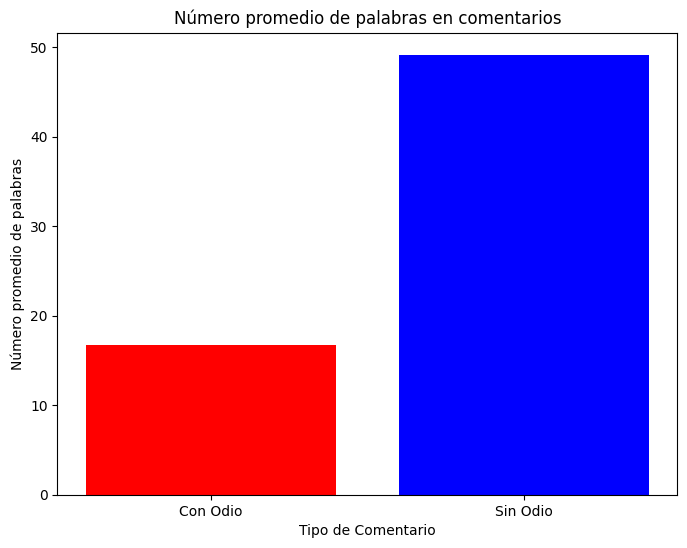

In [109]:
# Pregunta 4: Número promedio de palabras en comentarios con odio y sin odio
labels = ['Con Odio', 'Sin Odio']
promedios_palabras = [media_palabras_odio, media_palabras_no_odio]

plt.figure(figsize=(8, 6))
plt.bar(labels, promedios_palabras, color=['red', 'blue'])
plt.title('Número promedio de palabras en comentarios')
plt.xlabel('Tipo de Comentario')
plt.ylabel('Número promedio de palabras')
plt.show()

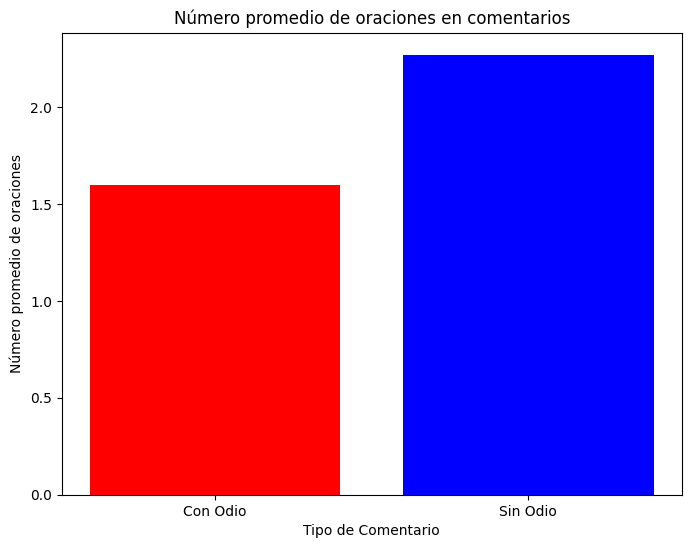

In [110]:
# Pregunta 5: Número promedio de oraciones en comentarios con odio y sin odio
promedios_oraciones = [promedio_oraciones_odio.mean(), promedio_oraciones_no_odio.mean()]

plt.figure(figsize=(8, 6))
plt.bar(labels, promedios_oraciones, color=['red', 'blue'])
plt.title('Número promedio de oraciones en comentarios')
plt.xlabel('Tipo de Comentario')
plt.ylabel('Número promedio de oraciones')
plt.show()

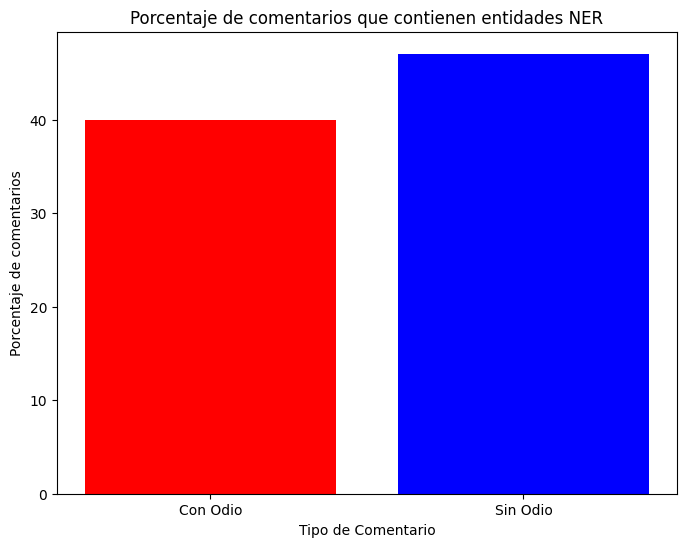

In [111]:
# Pregunta 6: Porcentaje de comentarios que contienen entidades NER en cada grupo
porcentajes_ner = [porcentaje_ner_odio.mean() * 100, porcentaje_ner_no_odio.mean() * 100]

plt.figure(figsize=(8, 6))
plt.bar(labels, porcentajes_ner, color=['red', 'blue'])
plt.title('Porcentaje de comentarios que contienen entidades NER')
plt.xlabel('Tipo de Comentario')
plt.ylabel('Porcentaje de comentarios')
plt.show()

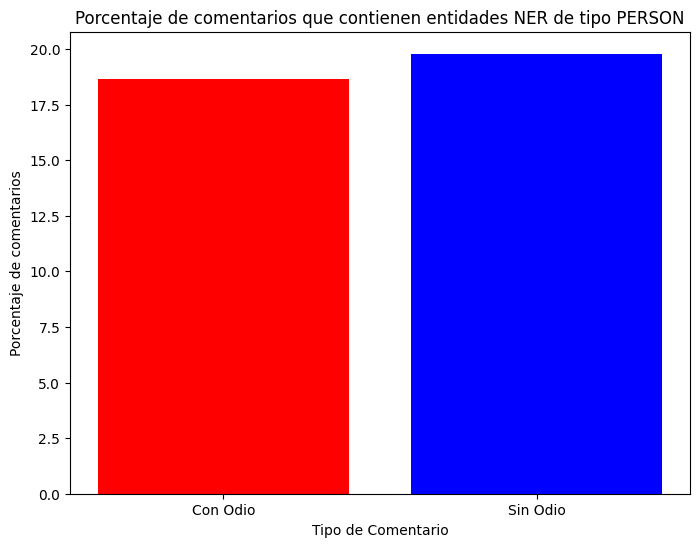

In [112]:
# Pregunta 7: Porcentaje de comentarios que contienen entidades NER de tipo PERSON en cada grupo
porcentajes_person_ner = [porcentaje_person_ner_odio.mean() * 100, porcentaje_person_ner_no_odio.mean() * 100]

plt.figure(figsize=(8, 6))
plt.bar(labels, porcentajes_person_ner, color=['red', 'blue'])
plt.title('Porcentaje de comentarios que contienen entidades NER de tipo PERSON')
plt.xlabel('Tipo de Comentario')
plt.ylabel('Porcentaje de comentarios')
plt.show()

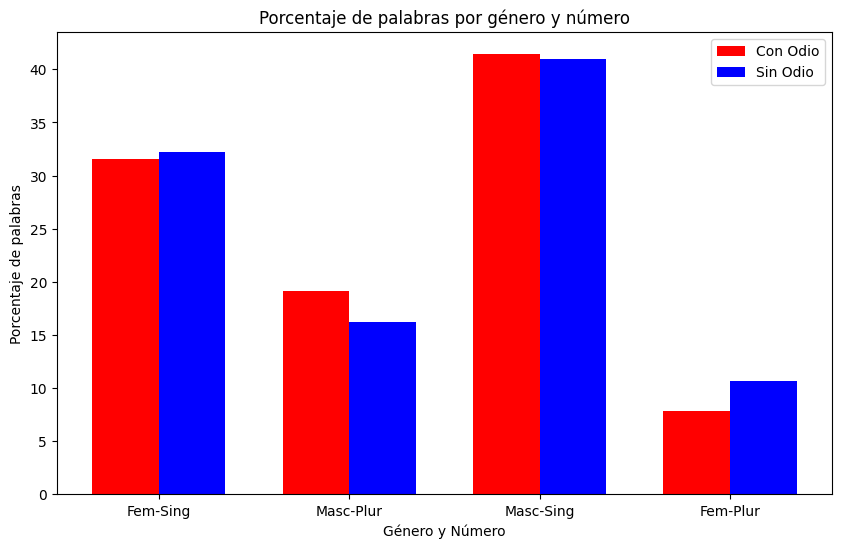

In [126]:
labels_gender_number = ['Fem-Sing', 'Masc-Plur', 'Masc-Sing', 'Fem-Plur']

# Convertir las etiquetas a tuplas para que coincidan con las claves en los diccionarios
labels_gender_number_tuples = [(label.split('-')[0], label.split('-')[1]) for label in labels_gender_number]

# Obtener los valores de los diccionarios usando las claves convertidas
percentages_odio_values = [percentages_odio.get(key, 0) for key in labels_gender_number_tuples]
percentages_no_odio_values = [percentages_no_odio.get(key, 0) for key in labels_gender_number_tuples]

x = range(len(labels_gender_number))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x, percentages_odio_values, width, label='Con Odio', color='red')
plt.bar([p + width for p in x], percentages_no_odio_values, width, label='Sin Odio', color='blue')
plt.title('Porcentaje de palabras por género y número')
plt.xlabel('Género y Número')
plt.ylabel('Porcentaje de palabras')
plt.xticks([p + width / 2 for p in x], labels_gender_number)
plt.legend()
plt.show()

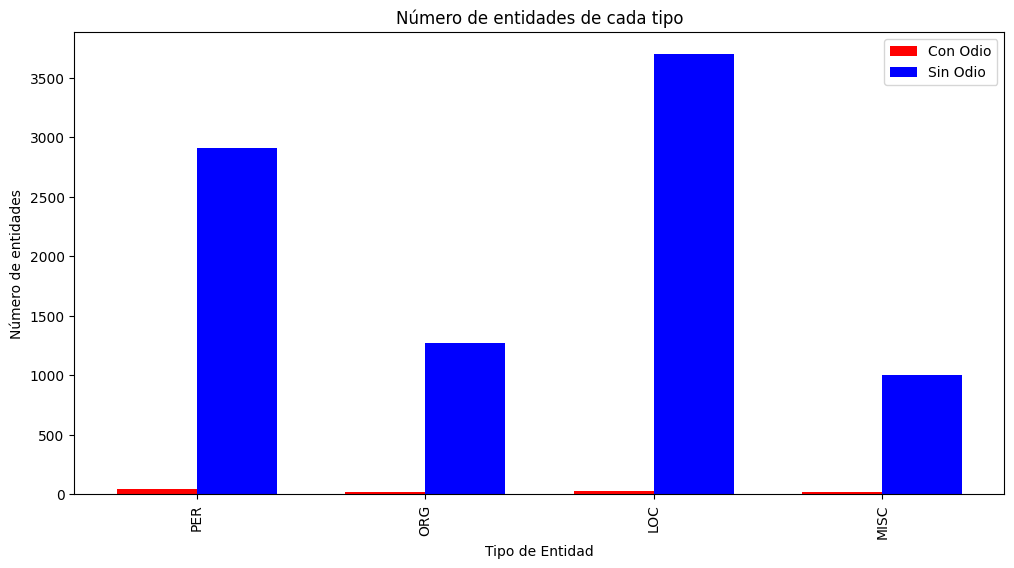

In [115]:
# Pregunta 9: Número de entidades de cada tipo en comentarios con odio y sin odio
labels_entities = list(set(entities_odio.keys()).union(set(entities_no_odio.keys())))
entities_odio_values = [entities_odio.get(entity, 0) for entity in labels_entities]
entities_no_odio_values = [entities_no_odio.get(entity, 0) for entity in labels_entities]
width = 0.35
x = range(len(labels_entities))

plt.figure(figsize=(12, 6))
plt.bar(x, entities_odio_values, width, label='Con Odio', color='red')
plt.bar([p + width for p in x], entities_no_odio_values, width, label='Sin Odio', color='blue')
plt.title('Número de entidades de cada tipo')
plt.xlabel('Tipo de Entidad')
plt.ylabel('Número de entidades')
plt.xticks([p + width / 2 for p in x], labels_entities, rotation=90)
plt.legend()
plt.show()

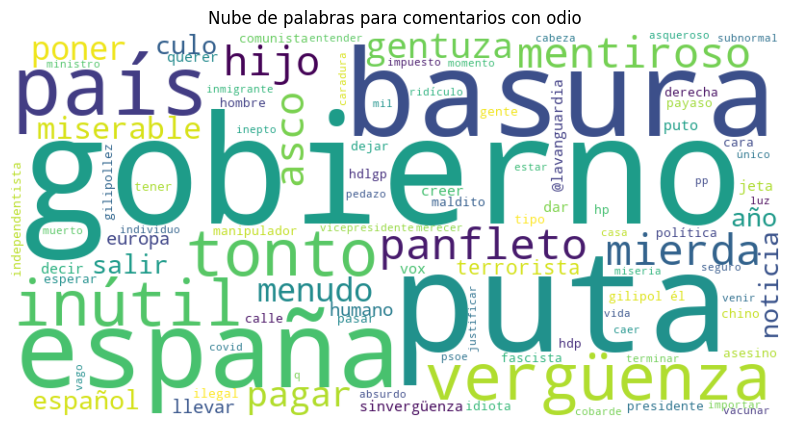

In [119]:
from wordcloud import WordCloud

# Crear una nube de palabras para los comentarios con odio
wordcloud_odio = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(top_lemmas_odio))

# Mostrar la nube de palabras para los comentarios con odio
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_odio, interpolation='bilinear')
plt.title('Nube de palabras para comentarios con odio')
plt.axis('off')
plt.show()

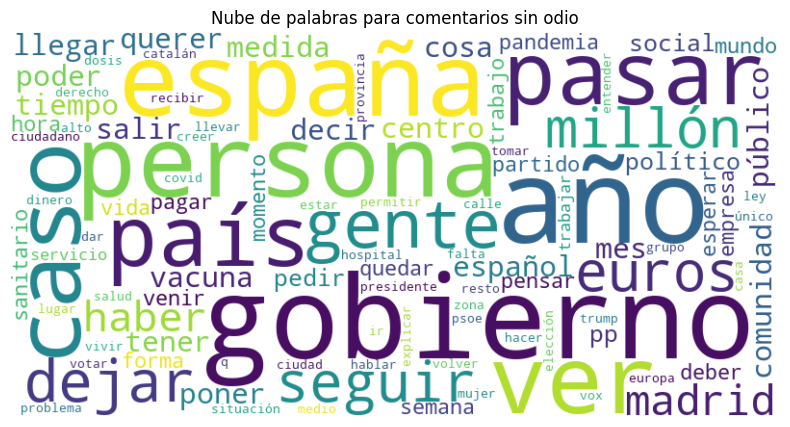

In [120]:
# Crear una nube de palabras para los comentarios sin odio
wordcloud_no_odio = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(top_lemmas_no_odio))

# Mostrar la nube de palabras para los comentarios sin odio
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_no_odio, interpolation='bilinear')
plt.title('Nube de palabras para comentarios sin odio')
plt.axis('off')
plt.show()

<p>Usamos un baremo (p<0.005) con las estadísticas anteriormente para ver si hay o no diferencias entre comentarios con o sin odio. En este caso, todas ellas cumplen que hay diferencias sustanciales entre ambas, por tanto, es algo más sencillo saber si un comentario tiene odio o no analizando estadísticamente estas variables. Pero, en nuestro caso, vamos a ir más alla, queremos usar este dataset también para determinar si hay o no odio usando técnicas de IA. Vamos a hacer un ejemplo de cómo sería el siguiente paso en un pipeline de desarrollo de un clasificador de odio, el entrenamiento.</p>

<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">OTRAS CONSIDERACIONES MUY IMPORTANTES A TENER EN CUENTA PARA RESPONDER A LA PREGUNTA 11</span>

<p>También, cabe mencionar que se pueden usar técnicas más sencillas para saber si un comentario tiene odio o no, aunque habría que comprobar que esto funcionase, claro. Se propone la idea de coger todos los comentarios de odio que haya en el dataset, y una muestra de igual tamaño de comentarios sin odio que cumplan con las métricas que hemos obtenido anteriormente para cada clase para querdarnos con una muestra representativa. Una vez tenemos esta muestra representativa, hacemos una lemmatización de las palabras más comunes en cada uno de ellos y ponemos un baremo, es decir, que tengan un mínimo de apariciones para que estçén en el top. Una vez tenemos ambas bolsas de palabras, procedemos a cruzarlas entre ellas, y nos quedaremos con aquellas que no sean comunes para cada una de las clases, es decir, aquellas que pertenezcana una clase y no a la otra. Con esto, tendremos las palabras más comunes que aparecen en la clase de odio y que no aparecen en la clase de no odio. Con esto, si analizamos los lemmas de un comentario que queremos clasificar y aparece una palabra que está dentro de este top discriminado, podremos darle más peso a ese comentario en esta clase. Lo mismo pero al contrario ocurriría para clasificar los comentarios de no odio. Estas técnicas nos servirán para, antes de entrenar un modelo, aplicar algunas métricas que nos ayuden a que la clasificación binaria sea más sencilla. </p>
<p>Incluso, para hacer esto, podemos asimilar el uso de técnicas de validación cruzada, es decir, no sólo obtener una muestra representativa de la clase de no odio, sino recorrer todo el dataset con batches del mismo tamaño que la muestra de odio (mismo tamaño de número de muestras o filas del dataset) para evaluar el top lemmas para cada una de estos batches posibles, para así tener más en cuenta toda la información del dataset.</p>

<p>Usaremos como ejemplo un Random Forest para aplicar técnica de Machine Learning a nuestro dataset. Aunque los resultados que hemos obtenido no sean demasiado buenos, porque tenemos demasiados falsos negativos, podremos posteriormente aplicar técnicas para evitar el oversampling o que se entrene sólo mirando el accuracy del modelo y no otras métricas como pueden ser el f1-score que tienen más en cuenta el número de falsos negativos, que en este caso es lo que queremos evitar. En este caso, los falsos negativos sería poner un comentario que contiene odio como que no contiene odio. También, podemos usar técnicas como el SMOTE para evitar estas malas métricas en la clase 1 o de odio, ya que podemos observar que todo son 0's. Esto es sólo un ejemplo que nos servirá para esta pregunta. </p>

In [96]:
data_cleaned['NUM_PALABRAS'] = data_cleaned['CONTENIDO A ANALIZAR'].str.split().str.len()
data_cleaned['NUM_ORACIONES'] = data_cleaned['ANALISIS_SPACY'].apply(lambda doc: len(list(doc.sents)))
data_cleaned['CONTIENE_NER'] = data_cleaned['ANALISIS_SPACY'].apply(contains_ner)
data_cleaned['CONTIENE_PERSON_NER'] = data_cleaned['ANALISIS_SPACY'].apply(contains_person_ner)

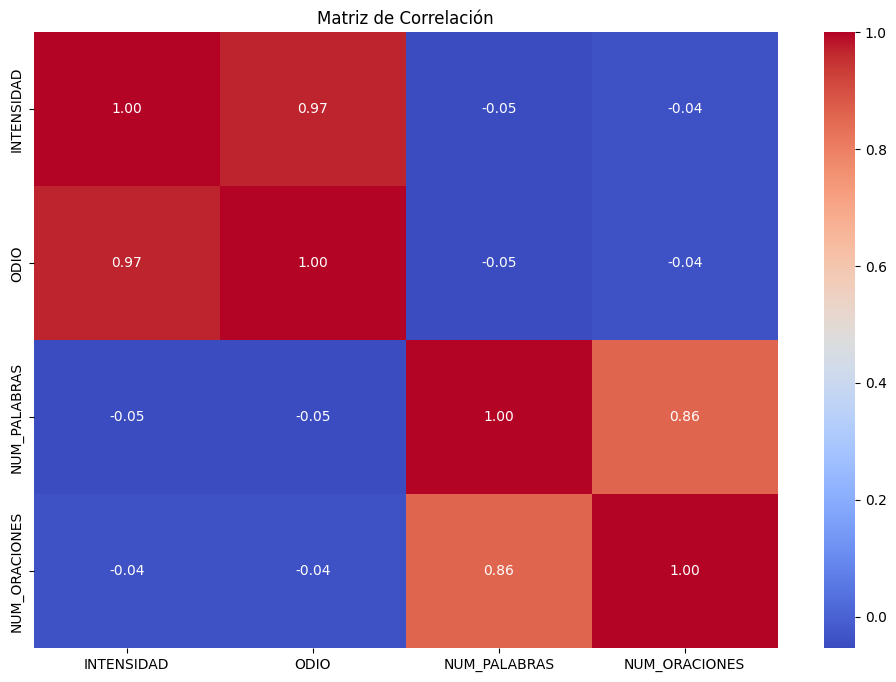

In [97]:
# Seleccionar solo las columnas numéricas
numeric_columns = data_cleaned.select_dtypes(include=['number'])

# Calcular la matriz de correlación
correlation_matrix = numeric_columns.corr()

# Crear un mapa de calor para la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()

<p>Esta matriz de confusión no es muy representativa, porque con el análisis que hemos hecho previamente, nos damos cuenta de que la longitud promedio de las oraciones o el número de palabras u oraciones si que permite de alguna manera discriminar entre clases. Esto puede ser debido a que en el cálculo de la matriz de covarianzas se tienen en cuenta otros baremos más matemáticos, que no se asemejan a lo que nosotros hemos visto en nuestro proceso anterior. </p>

In [98]:
# Seleccionar características y variable objetivo
features = data_cleaned[['NUM_PALABRAS', 'NUM_ORACIONES', 'CONTIENE_NER', 'CONTIENE_PERSON_NER']]
target = data_cleaned['ODIO']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_val, y_train, y_val = train_test_split(features, target, test_size=0.2, random_state=42)

# Entrenar modelo
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2250
           1       0.00      0.00      0.00        49

    accuracy                           0.98      2299
   macro avg       0.49      0.50      0.49      2299
weighted avg       0.96      0.98      0.97      2299



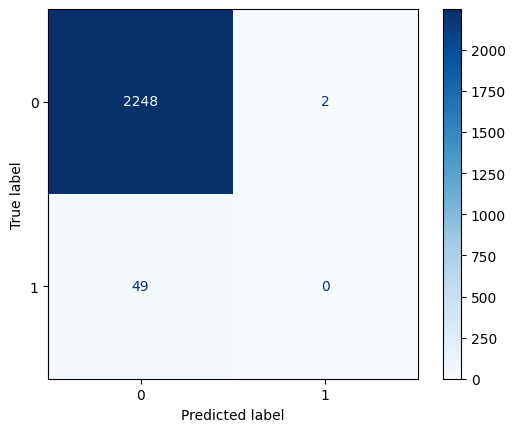

In [99]:
# Predicciones en el conjunto de validación
y_pred = clf.predict(X_val)

# Reporte de clasificación
print("Classification Report:")
print(classification_report(y_val, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap='Blues')
plt.show()

<p>Como aquí podemos observar, los resultados que hemos obtenido no son del todo buenos, ya que tenemos demasiados falsos negativos y las métricas para la clase 1 (comentarios con odio) son demasiado malas. Esto es debido a que se entrena el modelo con la precisión como métrica principal. Si estamos buscando precisión y las clases están muy desbalanceadas, para el modelo es muy sencillo clasificarlo todo como la clase mayoritaria porque así obtiene muy buena métrica porque sólo se equivoca en 51 casos de los casi que 2300 que tiene. Este enfoque es muy incorrecto y se debe tratar con técnicas como SMOTE o similares. Pero para este caso de ejemplo, con esto es suficiente y no es necesario continuar con el análisis.</p>

<span style="font-size: 12pt; font-weight: bold; color:rgb(135, 223, 255);">Vamos a probar a analizar el dataset completo con el análisis por batches para ver si funciona y no requiere de una capacidad de cómputo demasiado grande. Así, podemos cerciorarnos de que estamos obteniendo unos resultados similares en nuestro dataset corto. </span>

In [100]:
#data_cleaned_complete = pd.read_csv('dataset_limpio.csv', encoding='utf-8', low_memory=False, encoding_errors='replace')
#data_cleaned_complete['ANALISIS_SPACY'] = process_batches(data_cleaned_complete['CONTENIDO A ANALIZAR'].astype(str).tolist())

In [101]:
#data_cleaned_complete.to_csv('dataset_completo_con_spacy.csv', index=False, encoding='utf-8')

<p>Esta implementación se puede hacer en máquinas que tengan buena memoria RAM, ya que se produce un error en el kernel debido a que se sobrepasa el total de RAM cuando se está calculando el nlp para el total del dataset. Aunque, haciéndolo por batches, permite calcular un número mayor de líneas que de normal. Esto lo hemos experimentado y hemos conseguido trabajar con 11k registros en lugar de con 5k que era lo que podíamos hacer sin explotar el kernel haciendo el cálculo directamente sin batches.</p>